## Classifier Performance: selecting for reobservation
#### Plot to show performance when selecting Lya QSOs for reobservation
In this notebook, we load the results from all of our classifiers on a DESI-like subset of the BOSS DR12Q Superset, and compare the results in the context of selecting high-z Lya QSOs for reobservation. We define different strategies for combining the classifiers' classifications, and assess which of these is preferable.

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
  
import astropy
import copy
import numpy as np
from matplotlib import pyplot as plt

from quasarnet.io import read_truth
from qn_analysis import plot, strategy, utils, variables

In [2]:
figsize = (12,8)
fontsize = 18

plt.rc('font', size=fontsize)

### Load the results from the different classifiers

In [3]:
common_specids = False

## RR parameters
include_fits_rr = True

## QN parameters
n_detect = 1
c_th = 0.8
include_c_qn = True

## SQ parameters
p_min = 0.32
include_p_sq = True

In [4]:
f_truth = variables.OUTDIR+'/data/truth/truth_dr12q.fits'
truth = read_truth([f_truth])

In [5]:
data = {}

## Load the old RR data.
f_rr = variables.OUTDIR+'/results/rr_results/old/rr_sdr12q.fits'
data['RRold'] = utils.load_rr_data(f_rr)

## Load the RR data.
f_rr = variables.OUTDIR+'/results/rr_results/rr_sdr12q_coadd.fits'
data['RR coadd'] = utils.load_rr_data(f_rr,include_fits=include_fits_rr)

## Load the RRngp data.
f_rr = variables.OUTDIR+'/results/rr_results/rr_test_coadd_ngp.fits'
data['RRngp coadd'] = utils.load_rr_data(f_rr,include_fits=include_fits_rr)

## Load the RRngp archetypes data.
f_rr = variables.OUTDIR+'/results/rr_results/rr_sdr12q_archetypes_coadd.fits'
data['RRngp archetypes coadd'] = utils.load_rr_data(f_rr,include_fits=include_fits_rr)

## Load the RRngp randexp data.
f_rr = variables.OUTDIR+'/results/rr_results/rr_sdr12q_randexp.fits'
data['RRngp randexp'] = utils.load_rr_data(f_rr,include_fits=include_fits_rr)

## Load the RRngp archetypes randexp data.
f_rr = variables.OUTDIR+'/results/rr_results/rr_sdr12q_archetypes_randexp.fits'
data['RRngp archetypes randexp'] = utils.load_rr_data(f_rr,include_fits=include_fits_rr)

## Load the RRngp archetypes andmask randexp data.
f_rr = variables.OUTDIR+'/results/rr_results/rr_sdr12q_archetypes_andmask_randexp.fits'
data['RRngp archetypes andmask randexp'] = utils.load_rr_data(f_rr,include_fits=include_fits_rr)

## Load the RRngp bestexp data.
f_rr = variables.OUTDIR+'/results/rr_results/rr_sdr12q_bestexp.fits'
data['RRngp bestexp'] = utils.load_rr_data(f_rr,include_fits=include_fits_rr)

## Load the RR andmask data.
f_rr = variables.OUTDIR+'/results/rr_results/rr_sdr12q_andmask_coadd.fits'
data['RR andmask coadd'] = utils.load_rr_data(f_rr,include_fits=include_fits_rr)

## Load the RRngp andmask data.
f_rr = variables.OUTDIR+'/results/rr_results/rr_test_andmask_coadd_ngp.fits'
data['RRngp andmask coadd'] = utils.load_rr_data(f_rr,include_fits=include_fits_rr)

## Load the RRngp andmask randexp data.
f_rr = variables.OUTDIR+'/results/rr_results/rr_sdr12q_andmask_randexp.fits'
data['RRngp andmask randexp'] = utils.load_rr_data(f_rr,include_fits=include_fits_rr)

## Load the RRngp andmask bestexp data.
f_rr = variables.OUTDIR+'/results/rr_results/rr_sdr12q_andmask_bestexp.fits'
data['RRngp andmask bestexp'] = utils.load_rr_data(f_rr,include_fits=include_fits_rr)

## Load BOSS pipeline data.
f_pipe = variables.OUTDIR+'/results/dr12pipe_results/dr12pipe_sdr12q.fits'
#f_pipe = '../dr14pipe_results/dr14pipe_sdr12q.fits'
data['PIPE'] = utils.load_rr_data(f_pipe,include_fits=include_fits_rr)

## Load the QN data.
singexp_mode = 'randexp'
f_qn = variables.OUTDIR+'/outputs/qn_outputs/main_setup/{m}/prop_0.1/model_indtrain_0_0/qnAll-train_0.1_{m}_0_0-test_{m}.fits'.format(m=singexp_mode)
data['QN randexp'] = utils.load_qn_data(f_qn,n_detect=n_detect,c_th=c_th,include_c=include_c_qn)

## Load the old QN data.
f_qn = '/global/cfs/projectdirs/desi/users/jfarr/QuasarNET_paper_v0/results/qn_results/qn_performance_vs_snr/qn_modelsingexp_testsingexp.fits'
data['QNold'] = utils.load_qn_data(f_qn,n_detect=n_detect,c_th=c_th,include_c=include_c_qn)

## Load the QN data.
singexp_mode = 'bestexp'
f_qn = variables.OUTDIR+'/outputs/qn_outputs/main_setup/{m}/prop_0.1/model_indtrain_0_0/qnAll-train_0.1_{m}_0_0-test_{m}.fits'.format(m=singexp_mode)
data['QN bestexp'] = utils.load_qn_data(f_qn,n_detect=n_detect,c_th=c_th,include_c=include_c_qn)

## Load the QN data.
f_qn = variables.OUTDIR+'/outputs/qn_outputs/main_setup/coadd/prop_0.1/model_indtrain_0_0/qnAll-train_0.1_coadd_0_0-test_coadd.fits'
data['QN coadd'] = utils.load_qn_data(f_qn,n_detect=n_detect,c_th=c_th,include_c=include_c_qn)

## Load the SQ data.
# TODO: Need results for SQUEzE on single exposure data.
f_sq = variables.OUTDIR+'/results/sq_results/sq_sdr12q.fits'
data['SQ coadd'] = utils.load_sq_data(f_sq,p_min=p_min,include_p=include_p_sq)

In [6]:
for k in data.keys():
    print(k,len(data[k]))

RRold 546856
RR coadd 625167
RRngp coadd 282016
RRngp archetypes coadd 625167
RRngp randexp 625161
RRngp archetypes randexp 625161
RRngp archetypes andmask randexp 621482
RRngp bestexp 625158
RR andmask coadd 625033
RRngp andmask coadd 280370
RRngp andmask randexp 621482
RRngp andmask bestexp 621483
PIPE 627751
QN randexp 526624
QNold 473018
QN bestexp 526533
QN coadd 526466
SQ coadd 545494


### Find the set of common spectra, and reduce all data to that set
This finds which spectra* are common to all datasets, and removes any that are not common. It then matches the data from each classifier to each spectrum, and produces a single data table.

\* using spec_id = plate$\times$1000000000 + mjd$\times$10000 + fiber for BOSS, or spec_id = targetid for DESI (to be updated)

In [7]:
data_table = utils.reduce_data_to_table(data,truth,
                                  include_c_qn=include_c_qn,
                                  include_p_sq=include_p_sq,
                                  include_fits_rr=include_fits_rr,
                                  common_specids=common_specids)
data_table[:5]

WARN: could not find redrock fit data in RRold


SPEC_ID,OBJ_ID,ZCONF_PERSON,Z_VI,CLASS_VI,ISQSO_VI,Z_RRold,CLASS_RRold,ISQSO_RRold,ZWARN_RRold,Z_RR coadd,CLASS_RR coadd,ISQSO_RR coadd,FIT_SPECTYPE_RR coadd [9],FIT_Z_RR coadd [9],FIT_CHI2_RR coadd [9],FIT_ZWARN_RR coadd [9],FIT_RCHI2_RR coadd [9],ZWARN_RR coadd,Z_RRngp coadd,CLASS_RRngp coadd,ISQSO_RRngp coadd,FIT_SPECTYPE_RRngp coadd [9],FIT_Z_RRngp coadd [9],FIT_CHI2_RRngp coadd [9],FIT_ZWARN_RRngp coadd [9],FIT_RCHI2_RRngp coadd [9],ZWARN_RRngp coadd,Z_RRngp archetypes coadd,CLASS_RRngp archetypes coadd,ISQSO_RRngp archetypes coadd,FIT_SPECTYPE_RRngp archetypes coadd [9],FIT_Z_RRngp archetypes coadd [9],FIT_CHI2_RRngp archetypes coadd [9],FIT_ZWARN_RRngp archetypes coadd [9],FIT_RCHI2_RRngp archetypes coadd [9],ZWARN_RRngp archetypes coadd,Z_RRngp randexp,CLASS_RRngp randexp,ISQSO_RRngp randexp,FIT_SPECTYPE_RRngp randexp [9],FIT_Z_RRngp randexp [9],FIT_CHI2_RRngp randexp [9],FIT_ZWARN_RRngp randexp [9],FIT_RCHI2_RRngp randexp [9],ZWARN_RRngp randexp,Z_RRngp archetypes randexp,CLASS_RRngp archetypes randexp,ISQSO_RRngp archetypes randexp,FIT_SPECTYPE_RRngp archetypes randexp [9],FIT_Z_RRngp archetypes randexp [9],FIT_CHI2_RRngp archetypes randexp [9],FIT_ZWARN_RRngp archetypes randexp [9],FIT_RCHI2_RRngp archetypes randexp [9],ZWARN_RRngp archetypes randexp,Z_RRngp archetypes andmask randexp,CLASS_RRngp archetypes andmask randexp,ISQSO_RRngp archetypes andmask randexp,FIT_SPECTYPE_RRngp archetypes andmask randexp [9],FIT_Z_RRngp archetypes andmask randexp [9],FIT_CHI2_RRngp archetypes andmask randexp [9],FIT_ZWARN_RRngp archetypes andmask randexp [9],FIT_RCHI2_RRngp archetypes andmask randexp [9],ZWARN_RRngp archetypes andmask randexp,Z_RRngp bestexp,CLASS_RRngp bestexp,ISQSO_RRngp bestexp,FIT_SPECTYPE_RRngp bestexp [9],FIT_Z_RRngp bestexp [9],FIT_CHI2_RRngp bestexp [9],FIT_ZWARN_RRngp bestexp [9],FIT_RCHI2_RRngp bestexp [9],ZWARN_RRngp bestexp,Z_RR andmask coadd,CLASS_RR andmask coadd,ISQSO_RR andmask coadd,FIT_SPECTYPE_RR andmask coadd [9],FIT_Z_RR andmask coadd [9],FIT_CHI2_RR andmask coadd [9],FIT_ZWARN_RR andmask coadd [9],FIT_RCHI2_RR andmask coadd [9],ZWARN_RR andmask coadd,Z_RRngp andmask coadd,CLASS_RRngp andmask coadd,ISQSO_RRngp andmask coadd,FIT_SPECTYPE_RRngp andmask coadd [9],FIT_Z_RRngp andmask coadd [9],FIT_CHI2_RRngp andmask coadd [9],FIT_ZWARN_RRngp andmask coadd [9],FIT_RCHI2_RRngp andmask coadd [9],ZWARN_RRngp andmask coadd,Z_RRngp andmask randexp,CLASS_RRngp andmask randexp,ISQSO_RRngp andmask randexp,FIT_SPECTYPE_RRngp andmask randexp [9],FIT_Z_RRngp andmask randexp [9],FIT_CHI2_RRngp andmask randexp [9],FIT_ZWARN_RRngp andmask randexp [9],FIT_RCHI2_RRngp andmask randexp [9],ZWARN_RRngp andmask randexp,Z_RRngp andmask bestexp,CLASS_RRngp andmask bestexp,ISQSO_RRngp andmask bestexp,FIT_SPECTYPE_RRngp andmask bestexp [9],FIT_Z_RRngp andmask bestexp [9],FIT_CHI2_RRngp andmask bestexp [9],FIT_ZWARN_RRngp andmask bestexp [9],FIT_RCHI2_RRngp andmask bestexp [9],ZWARN_RRngp andmask bestexp,Z_PIPE,CLASS_PIPE,ISQSO_PIPE,FIT_SPECTYPE_PIPE [10],FIT_Z_PIPE [10],FIT_CHI2_PIPE [10],FIT_ZWARN_PIPE [10],FIT_RCHI2_PIPE [10],ZWARN_PIPE,Z_QN randexp,CLASS_QN randexp,ISQSO_QN randexp,C_QN randexp [6],Z_LINES_QN randexp [6],Z_QNold,CLASS_QNold,ISQSO_QNold,C_QNold [6],Z_LINES_QNold [6],Z_QN bestexp,CLASS_QN bestexp,ISQSO_QN bestexp,C_QN bestexp [6],Z_LINES_QN bestexp [6],Z_QN coadd,CLASS_QN coadd,ISQSO_QN coadd,C_QN coadd [6],Z_LINES_QN coadd [6],Z_SQ coadd,CLASS_SQ coadd,ISQSO_SQ coadd,P_SQ coadd
int64,int64,int64,float64,str8,bool,float64,str8,bool,int64,float64,str8,bool,str8,float64,float64,int64,float64,int64,float64,str8,bool,str8,float64,float64,int64,float64,int64,float64,str8,bool,str8,float64,float64,int64,float64,int64,float64,str8,bool,str8,float64,float64,int64,float64,int64,float64,str8,bool,str8,float64,float64,int64,float64,int64,float64,str8,bool,str8,float64,float64,int64,float64,int64,float64,str8,bool,str8,float64,float64,int64,float64,int64,float64,str8,bool,str8,float64,float64,int64,float64,int64,flo

In [8]:
# Include only objects in the data table that have the highest confidence level, and VI redshift not equal to -1.
w = (data_table['ZCONF_PERSON']==2) & (data_table['Z_VI']>-1)
data_table = data_table[w]
print('INFO: removed {}/{} spectra, {} left'.format((~w).sum(),len(w),len(data_table)))

INFO: removed 26851/628763 spectra, 601912 left


In [9]:
for rr in ['RRngp randexp','RRngp archetypes randexp']:
    for c in ['STAR','GALAXY','QSO']:
        print(c,(data_table['CLASS_{}'.format(rr)]==c).sum(), end=' // ')
    print(' ')

STAR 85505 // GALAXY 205034 // QSO 310901 //  
STAR 153709 // GALAXY 86735 // QSO 360996 //  


### Evaluate performance of classifiers at selecting for reobservation.
xxx

In [ ]:
data_table_archive = copy.deepcopy(data_table)

In [24]:
## Define parameters
n_highz_desi = 50
zcut = 2.1
dv_max = 6000. # km/s

# QN/SQ confidence thresholds.
cth_min = 0.05
cth_max = 0.95
n_cth = 10
c_th_values = np.linspace(cth_min,cth_max,n_cth)

In [25]:
# Define the strategies.
stratdefs = {}

# QNold definitions.
n_detect = 1
strat = strategy.Strategy('qn',cf_kwargs={'qn_name':'QNold'})
preds = [strat.predict(data_table,c_kwargs={'c_th':c_th_value,'n_detect':n_detect}) for c_th_value in c_th_values]
stratdefs['QNold'] = {'w': [pred.get_ishighzqso(zcut=zcut) for pred in preds],
                   'color': c_th_values, 'marker': '*', 'i_cb': 0}

# QN randexp definitions.
n_detect = 1
strat = strategy.Strategy('qn',cf_kwargs={'qn_name':'QN randexp'})
preds = [strat.predict(data_table,c_kwargs={'c_th':c_th_value,'n_detect':n_detect}) for c_th_value in c_th_values]
stratdefs['QN randexp'] = {'w': [pred.get_ishighzqso(zcut=zcut) for pred in preds],
                   'color': c_th_values, 'marker': 'o', 'i_cb': 0}

# QN2line randexp definitions.
n_detect = 2
strat = strategy.Strategy('qn',cf_kwargs={'qn_name':'QN randexp'})
preds = [strat.predict(data_table,c_kwargs={'c_th':c_th_value,'n_detect':n_detect}) for c_th_value in c_th_values]
stratdefs['QN2line'] = {'w': [pred.get_ishighzqso(zcut=zcut) for pred in preds],
                        'color': c_th_values, 'marker': '^', 'i_cb': 0}

# QN bestexp definitions.
n_detect = 1
strat = strategy.Strategy('qn',cf_kwargs={'qn_name':'QN bestexp'})
preds = [strat.predict(data_table,c_kwargs={'c_th':c_th_value,'n_detect':n_detect}) for c_th_value in c_th_values]
stratdefs['QN bestexp'] = {'w': [pred.get_ishighzqso(zcut=zcut) for pred in preds],
                   'color': c_th_values, 'marker': 'o', 'i_cb': 0}

# QN2line bestexp definitions.
n_detect = 2
strat = strategy.Strategy('qn',cf_kwargs={'qn_name':'QN bestexp'})
preds = [strat.predict(data_table,c_kwargs={'c_th':c_th_value,'n_detect':n_detect}) for c_th_value in c_th_values]
stratdefs['bestexp'] = {'w': [pred.get_ishighzqso(zcut=zcut) for pred in preds],
                        'color': c_th_values, 'marker': '^', 'i_cb': 0}

# QN 1 point randexp definitions.
c_th = 0.3
n_detect = 1
strat = strategy.Strategy('qn',cf_kwargs={'qn_name':'QN randexp'})
preds = [strat.predict(data_table,c_kwargs={'c_th':c_th,'n_detect':n_detect})]
stratdefs['QN randexp 1point'] = {'w': [pred.get_ishighzqso(zcut=zcut) for pred in preds],
                   'color': 'k', 'marker': 'o'}

# QN 1 point bestexp definitions.
c_th = 0.3
n_detect = 1
strat = strategy.Strategy('qn',cf_kwargs={'qn_name':'QN bestexp'})
preds = [strat.predict(data_table,c_kwargs={'c_th':c_th,'n_detect':n_detect})]
stratdefs['QN bestexp 1point'] = {'w': [pred.get_ishighzqso(zcut=zcut) for pred in preds],
                   'color': utils.colours['C1'], 'marker': 'o'}

# QN2line 1point randexp definitions.
c_th = 0.3
n_detect = 2
strat = strategy.Strategy('qn',cf_kwargs={'qn_name':'QN randexp'})
preds = [strat.predict(data_table,c_kwargs={'c_th':c_th,'n_detect':n_detect})]
stratdefs['QN2line randexp 1point'] = {'w': [pred.get_ishighzqso(zcut=zcut) for pred in preds],
                        'color': 'k', 'marker': '^'}

# QN2line 1point bestexp definitions.
c_th = 0.3
n_detect = 2
strat = strategy.Strategy('qn',cf_kwargs={'qn_name':'QN bestexp'})
preds = [strat.predict(data_table,c_kwargs={'c_th':c_th,'n_detect':n_detect})]
stratdefs['QN2line bestexp 1point'] = {'w': [pred.get_ishighzqso(zcut=zcut) for pred in preds],
                        'color': utils.colours['C1'], 'marker': '^'}

# QN coadd definitions.
n_detect = 1
strat = strategy.Strategy('qn',cf_kwargs={'qn_name':'QN coadd'})
preds = [strat.predict(data_table,c_kwargs={'c_th':c_th_value,'n_detect':n_detect}) for c_th_value in c_th_values]
stratdefs['QN coadd'] = {'w': [pred.get_ishighzqso(zcut=zcut) for pred in preds],
                        'color': c_th_values, 'marker': 'd', 'i_cb': 0}

# RRold definitions.
strat = strategy.Strategy('rr',cf_kwargs={'rr_name':'RRold'})
preds = [strat.predict(data_table)]
stratdefs['RRold'] = {'w': [pred.get_ishighzqso(zcut=zcut) for pred in preds],
                      'color': 'grey', 'marker': 'o'}

# RR coadd definitions.
strat = strategy.Strategy('rr',cf_kwargs={'rr_name':'RR coadd'})
preds = [strat.predict(data_table)]
stratdefs['RR coadd'] = {'w': [pred.get_ishighzqso(zcut=zcut) for pred in preds],
                   'color': 'r', 'marker': '+'}

# RRngp coadd definitions.
strat = strategy.Strategy('rr',cf_kwargs={'rr_name':'RRngp coadd'})
preds = [strat.predict(data_table)]
stratdefs['RRngp coadd'] = {'w': [pred.get_ishighzqso(zcut=zcut) for pred in preds],
                      'color': 'r', 'marker': 'p'}

# RRngp archetypes definitions.
strat = strategy.Strategy('rr',cf_kwargs={'rr_name':'RRngp archetypes coadd'})
preds = [strat.predict(data_table)]
stratdefs['RRngp archetypes coadd'] = {'w': [pred.get_ishighzqso(zcut=zcut) for pred in preds],
                              'color': 'r', 'marker': '*'}

# RRngp randexp definitions.
strat = strategy.Strategy('rr',cf_kwargs={'rr_name':'RRngp randexp'})
preds = [strat.predict(data_table)]
stratdefs['RRngp randexp'] = {'w': [pred.get_ishighzqso(zcut=zcut) for pred in preds],
                              'color': 'k', 'marker': 'p'}

# RRngp archetypes randexp definitions.
strat = strategy.Strategy('rr',cf_kwargs={'rr_name':'RRngp archetypes randexp'})
c_kwargs = {'zwarn': None}
preds = [strat.predict(data_table,c_kwargs=c_kwargs)]
stratdefs['RRngp archetypes randexp'] = {'w': [pred.get_ishighzqso(zcut=zcut) for pred in preds],
                              'color': 'k', 'marker': '*'}

# RRngp archetypes randexp alt definitions.
strat = strategy.Strategy('rr',cf_kwargs={'rr_name':'RRngp archetypes randexp'})
c_kwargs = {'zwarn': None}
no_neg_mod = ((data_table['ZWARN_RRngp archetypes randexp'] & 2**3)==0)
preds = [strat.predict(data_table,c_kwargs=c_kwargs)]
stratdefs['RRngp archetypes randexp alt'] = {'w': [pred.get_ishighzqso(zcut=zcut)&no_neg_mod for pred in preds],
                              'color': 'k', 'marker': '1'}

# RRngp archetypes randexp definitions.
strat = strategy.Strategy('rr',cf_kwargs={'rr_name':'RRngp archetypes randexp'})
c_kwargs = {'zwarn': False}
preds = [strat.predict(data_table,c_kwargs=c_kwargs)]
stratdefs['RRngp archetypes randexp &~zwarn'] = {'w': [pred.get_ishighzqso(zcut=zcut) for pred in preds],
                              'color': 'k', 'marker': 'H'}

# RRngp archetypes andmask randexp definitions.
strat = strategy.Strategy('rr',cf_kwargs={'rr_name':'RRngp archetypes andmask randexp'})
c_kwargs = {'zwarn': None}
preds = [strat.predict(data_table,c_kwargs=c_kwargs)]
stratdefs['RRngp archetypes andmask randexp'] = {'w': [pred.get_ishighzqso(zcut=zcut) for pred in preds],
                              'color': 'k', 'marker': 'D'}

# RRngp bestexp definitions.
strat = strategy.Strategy('rr',cf_kwargs={'rr_name':'RRngp bestexp'})
preds = [strat.predict(data_table)]
stratdefs['RRngp bestexp'] = {'w': [pred.get_ishighzqso(zcut=zcut) for pred in preds],
                              'color': utils.colours['C1'], 'marker': 'p'}

# RR andmask coadd definitions.
strat = strategy.Strategy('rr',cf_kwargs={'rr_name':'RR andmask coadd'})
preds = [strat.predict(data_table)]
stratdefs['RR andmask coadd'] = {'w': [pred.get_ishighzqso(zcut=zcut) for pred in preds],
                   'color': 'r', 'marker': 'X'}

# RRngp andmask coadd definitions.
strat = strategy.Strategy('rr',cf_kwargs={'rr_name':'RRngp andmask coadd'})
preds = [strat.predict(data_table)]
stratdefs['RRngp andmask coadd'] = {'w': [pred.get_ishighzqso(zcut=zcut) for pred in preds],
                      'color': 'r', 'marker': 'd'}

# RRngp andmask randexp definitions.
strat = strategy.Strategy('rr',cf_kwargs={'rr_name':'RRngp andmask randexp'})
preds = [strat.predict(data_table)]
stratdefs['RRngp andmask randexp'] = {'w': [pred.get_ishighzqso(zcut=zcut) for pred in preds],
                              'color': 'k', 'marker': 'd'}

# RRngp andmask bestexp definitions.
strat = strategy.Strategy('rr',cf_kwargs={'rr_name':'RRngp andmask bestexp'})
preds = [strat.predict(data_table)]
stratdefs['RRngp andmask bestexp'] = {'w': [pred.get_ishighzqso(zcut=zcut) for pred in preds],
                              'color': utils.colours['C1'], 'marker': 'd'}

# RRngp|zwarn andmask randexp definitions.
strat = strategy.Strategy('rr',cf_kwargs={'rr_name':'RRngp andmask randexp'})
preds = [strat.predict(data_table,c_kwargs={'zwarn':True})]
stratdefs['RRngp|zwarn andmask randexp'] = {'w': [pred.get_ishighzqso(zcut=zcut) for pred in preds],
                   'color': 'k', 'marker': 4}

# RRngp&~zwarn andmask randexp definitions.
strat = strategy.Strategy('rr',cf_kwargs={'rr_name':'RRngp andmask randexp'})
preds = [strat.predict(data_table,c_kwargs={'zwarn':False})]
stratdefs['RRngp&~zwarn andmask randexp'] = {'w': [pred.get_ishighzqso(zcut=zcut) for pred in preds],
                          'color': 'k', 'marker': 5}

# PIPE definitions.
strat = strategy.Strategy('rr',cf_kwargs={'rr_name':'PIPE'})
preds = [strat.predict(data_table)]
stratdefs['PIPE'] = {'w': [pred.get_ishighzqso(zcut=zcut) for pred in preds],
                     'color': 'r', 'marker': 'P'}

# SQ coadd definitions.
n_detect = 1
strat = strategy.Strategy('sq',cf_kwargs={'sq_name':'SQ coadd'})
preds = [strat.predict(data_table,c_kwargs={'p_min':c_th_value}) for c_th_value in c_th_values]
stratdefs['SQ coadd'] = {'w': [pred.get_ishighzqso(zcut=zcut) for pred in preds],
                        'color': c_th_values, 'marker': 'x', 'i_cb': 0}



## Simple combinations.

## QN|RRold definitions.
n_detect = 1
stratdefs['QN|RRold'] = {'w': [w|stratdefs['RRold']['w'][0] for w in stratdefs['QN randexp']['w']],
                      'color': c_th_values, 'marker': 'v', 'i_cb': 0}

## QN|RRngp randexp definitions.
n_detect = 1
stratdefs['QN|RRngp randexp'] = {'w': [w|stratdefs['RRngp randexp']['w'][0] for w in stratdefs['QN randexp']['w']],
                      'color': c_th_values, 'marker': 'v', 'i_cb': 0}

## QN&RRngp randexp definitions.
n_detect = 1
stratdefs['QN&RRngp randexp'] = {'w': [w&stratdefs['RRngp randexp']['w'][0] for w in stratdefs['QN randexp']['w']],
                      'color': c_th_values, 'marker': 'd', 'i_cb': 0}

## QN|RRngp bestexp definitions.
n_detect = 1
stratdefs['QN|RRngp bestexp'] = {'w': [w|stratdefs['RRngp bestexp']['w'][0] for w in stratdefs['QN bestexp']['w']],
                      'color': c_th_values, 'marker': 'v', 'i_cb': 0}

## QN&RRngp bestexp definitions.
n_detect = 1
stratdefs['QN&RRngp bestexp'] = {'w': [w&stratdefs['RRngp bestexp']['w'][0] for w in stratdefs['QN bestexp']['w']],
                      'color': c_th_values, 'marker': 'd', 'i_cb': 0}

## QN|RRngp randexp definitions.
n_detect = 1
stratdefs['QN|RRngp andmask randexp'] = {'w': [w|stratdefs['RRngp andmask randexp']['w'][0] for w in stratdefs['QN randexp']['w']],
                      'color': c_th_values, 'marker': 'v', 'i_cb': 0}

## QN&RRngp randexp definitions.
n_detect = 1
stratdefs['QN&RRngp andmask randexp'] = {'w': [w&stratdefs['RRngp andmask randexp']['w'][0] for w in stratdefs['QN randexp']['w']],
                      'color': c_th_values, 'marker': 'd', 'i_cb': 0}

## QN|RRngp bestexp definitions.
n_detect = 1
stratdefs['QN|RRngp andmask bestexp'] = {'w': [w|stratdefs['RRngp andmask bestexp']['w'][0] for w in stratdefs['QN bestexp']['w']],
                      'color': c_th_values, 'marker': 'v', 'i_cb': 0}

## QN&RRngp bestexp definitions.
n_detect = 1
stratdefs['QN&RRngp andmask bestexp'] = {'w': [w&stratdefs['RRngp andmask bestexp']['w'][0] for w in stratdefs['QN bestexp']['w']],
                      'color': c_th_values, 'marker': 'd', 'i_cb': 0}

## QN|RRngp randexp 1 point definitions.
n_detect = 1
stratdefs['QN|RRngp randexp 1point'] = {'w': [stratdefs['QN randexp 1point']['w'][0]|stratdefs['RRngp randexp']['w'][0]],
                      'color': 'k', 'marker': 'v'}

## QN&RRngp randexp 1 point definitions.
n_detect = 1
stratdefs['QN&RRngp randexp 1point'] = {'w': [stratdefs['QN randexp 1point']['w'][0]&stratdefs['RRngp randexp']['w'][0]],
                      'color': 'k', 'marker': 'd'}

## QN&RRngp bestexp 1 point definitions.
n_detect = 1
stratdefs['QN|RRngp bestexp 1point'] = {'w': [stratdefs['QN bestexp 1point']['w'][0]|stratdefs['RRngp bestexp']['w'][0]],
                      'color': utils.colours['C1'], 'marker': 'v'}

## QN&RRngp bestexp 1 point definitions.
n_detect = 1
stratdefs['QN&RRngp bestexp 1point'] = {'w': [stratdefs['QN bestexp 1point']['w'][0]&stratdefs['RRngp bestexp']['w'][0]],
                      'color': utils.colours['C1'], 'marker': 'd'}

## QN|RRngp randexp 1 point definitions.
n_detect = 1
stratdefs['QN|RRngp andmask randexp 1point'] = {'w': [stratdefs['QN randexp 1point']['w'][0]|stratdefs['RRngp andmask randexp']['w'][0]],
                      'color': 'k', 'marker': 'v'}

## QN&RRngp randexp 1 point definitions.
n_detect = 1
stratdefs['QN&RRngp andmask randexp 1point'] = {'w': [stratdefs['QN randexp 1point']['w'][0]&stratdefs['RRngp andmask randexp']['w'][0]],
                      'color': 'k', 'marker': 'd'}

## QN|RRngp bestexp 1 point definitions.
n_detect = 1
stratdefs['QN|RRngp andmask bestexp 1point'] = {'w': [stratdefs['QN bestexp 1point']['w'][0]|stratdefs['RRngp andmask bestexp']['w'][0]],
                      'color': utils.colours['C1'], 'marker': 'v'}

## QN&RRngp bestexp 1 point definitions.
n_detect = 1
stratdefs['QN&RRngp andmask bestexp 1point'] = {'w': [stratdefs['QN bestexp 1point']['w'][0]&stratdefs['RRngp andmask bestexp']['w'][0]],
                      'color': utils.colours['C1'], 'marker': 'd'}

## QN|RRngp archetypes randexp definitions.
n_detect = 1
stratdefs['QN|RRngp archetypes randexp'] = {'w': [w|stratdefs['RRngp archetypes randexp']['w'][0] for w in stratdefs['QN randexp']['w']],
                      'color': c_th_values, 'marker': '*', 'i_cb': 0}

## QN|RRngp archetypes randexp alt definitions.
n_detect = 1
stratdefs['QN|RRngp archetypes randexp alt'] = {'w': [w|stratdefs['RRngp archetypes randexp alt']['w'][0] for w in stratdefs['QN randexp']['w']],
                      'color': c_th_values, 'marker': '1', 'i_cb': 0}

## QN|RRngp archetypes andmask randexp definitions.
n_detect = 1
stratdefs['QN|RRngp archetypes andmask randexp'] = {'w': [w|stratdefs['RRngp archetypes andmask randexp']['w'][0] for w in stratdefs['QN randexp']['w']],
                      'color': c_th_values, 'marker': '1', 'i_cb': 0}



In [26]:
exp_colours = {'randexp': 'k', 'bestexp': utils.colours['C1']}
exptypes = ['randexp','bestexp']

drc2_th_values = [0.,0.001,0.002,0.003,0.004,0.005]
for drc2_th in drc2_th_values:
    for exptype in exptypes:

        # RRngp drc2 definitions.
        c = 'RRngp {}'.format(exptype)
        drc2 = data_table['FIT_RCHI2_{}'.format(c)].data - data_table['FIT_RCHI2_{}'.format(c)].data.min(axis=1).reshape((len(data_table),1))
        below_th = drc2<=drc2_th
        ishighzqso = ((data_table['FIT_SPECTYPE_{}'.format(c)].data=='QSO') & (data_table['FIT_Z_{}'.format(c)].data>=2.1) & below_th).any(axis=1)
        stratdefs['RRngp-{}-drc2th {}'.format(exptype[0],drc2_th)] = {'w': [ishighzqso],
                                      'color': exp_colours[exptype], 'marker': 'X'}

        ## QN|RRngp drc2 1 point definitions.
        n_detect = 1
        stratdefs['QN|RRngp-{}-drc2th {} 1point'.format(exptype[0],drc2_th)] = {'w': [stratdefs['QN {} 1point'.format(exptype)]['w'][0]|stratdefs['RRngp-{}-drc2th {}'.format(exptype[0],drc2_th)]['w'][0]],
                          'color': exp_colours[exptype], 'marker': 'v'}

        ## QN|RRngp drc2 definitions.
        n_detect = 1
        stratdefs['QN|RRngp-{}-drc2th {}'.format(exptype[0],drc2_th)] = {'w': [w|stratdefs['RRngp-{}-drc2th {}'.format(exptype[0],drc2_th)]['w'][0] for w in stratdefs['QN {}'.format(exptype)]['w']],
                          'color': c_th_values, 'marker': 'v', 'i_cb': 0}

        ## QN&RRngp drc2 definitions.
        n_detect = 1
        stratdefs['QN&RRngp-{}-drc2th {}'.format(exptype[0],drc2_th)] = {'w': [w&stratdefs['RRngp-{}-drc2th {}'.format(exptype[0],drc2_th)]['w'][0] for w in stratdefs['QN {}'.format(exptype)]['w']],
                          'color': c_th_values, 'marker': '^', 'i_cb': 0}

        # RRngp andmask drc2 definitions.
        c = 'RRngp andmask {}'.format(exptype)
        drc2 = data_table['FIT_RCHI2_{}'.format(c)].data - data_table['FIT_RCHI2_{}'.format(c)].data.min(axis=1).reshape((len(data_table),1))
        below_th = drc2<=drc2_th
        ishighzqso = ((data_table['FIT_SPECTYPE_{}'.format(c)].data=='QSO') & (data_table['FIT_Z_{}'.format(c)].data>=2.1) & below_th).any(axis=1)
        stratdefs['RRngp-a-{}-drc2th {}'.format(exptype[0],drc2_th)] = {'w': [ishighzqso],
                                      'color': exp_colours[exptype], 'marker': 'X'}

        ## QN|RRngp andmask drc2 1 point definitions.
        n_detect = 1
        stratdefs['QN|RRngp-a-{}-drc2th {} 1point'.format(exptype[0],drc2_th)] = {'w': [stratdefs['QN {} 1point'.format(exptype)]['w'][0]|stratdefs['RRngp-a-{}-drc2th {}'.format(exptype[0],drc2_th)]['w'][0]],
                          'color': exp_colours[exptype], 'marker': 'v'}

        ## QN|RRngp andmask drc2 definitions.
        n_detect = 1
        stratdefs['QN|RRngp-a-{}-drc2th {}'.format(exptype[0],drc2_th)] = {'w': [w|stratdefs['RRngp-a-{}-drc2th {}'.format(exptype[0],drc2_th)]['w'][0] for w in stratdefs['QN {}'.format(exptype)]['w']],
                          'color': c_th_values, 'marker': 'v', 'i_cb': 0}
        
        ## QN&RRngp andmask drc2 definitions.
        n_detect = 1
        stratdefs['QN&RRngp-a-{}-drc2th {}'.format(exptype[0],drc2_th)] = {'w': [w&stratdefs['RRngp-a-{}-drc2th {}'.format(exptype[0],drc2_th)]['w'][0] for w in stratdefs['QN {}'.format(exptype)]['w']],
                          'color': c_th_values, 'marker': '^', 'i_cb': 0}
        
         
    # RRngp archetypes randexp definitions.
    c = 'RRngp archetypes randexp'
    drc2 = data_table['FIT_RCHI2_{}'.format(c)].data - data_table['FIT_RCHI2_{}'.format(c)].data.min(axis=1).reshape((len(data_table),1))
    below_th = drc2<=drc2_th
    ishighzqso = ((data_table['FIT_SPECTYPE_{}'.format(c)].data=='QSO') & (data_table['FIT_Z_{}'.format(c)].data>=2.1) & below_th).any(axis=1)
    stratdefs['RRngp-arch-r-drc2th {}'.format(drc2_th)] = {'w': [ishighzqso],
                                  'color': exp_colours[exptype], 'marker': '2'}

    # RRngp archetypes randexp alt definitions.
    c = 'RRngp archetypes randexp'
    drc2 = data_table['FIT_RCHI2_{}'.format(c)].data - data_table['FIT_RCHI2_{}'.format(c)].data.min(axis=1).reshape((len(data_table),1))
    below_th = drc2<=drc2_th
    no_neg_mod = ((data_table['FIT_ZWARN_{}'.format(c)] & 2**3)==0)                                               
    ishighzqso = ((data_table['FIT_SPECTYPE_{}'.format(c)].data=='QSO') & (data_table['FIT_Z_{}'.format(c)].data>=2.1) & below_th & no_neg_mod).any(axis=1)
    stratdefs['RRngp-arch-r-drc2th {} alt'.format(drc2_th)] = {'w': [ishighzqso],
                                  'color': exp_colours[exptype], 'marker': '2'}

    # RRngp archetypes andmask randexp definitions.
    c = 'RRngp archetypes andmask randexp'
    drc2 = data_table['FIT_RCHI2_{}'.format(c)].data - data_table['FIT_RCHI2_{}'.format(c)].data.min(axis=1).reshape((len(data_table),1))
    below_th = drc2<=drc2_th
    ishighzqso = ((data_table['FIT_SPECTYPE_{}'.format(c)].data=='QSO') & (data_table['FIT_Z_{}'.format(c)].data>=2.1) & below_th).any(axis=1)
    stratdefs['RRngp-arch-a-r-drc2th {}'.format(drc2_th)] = {'w': [ishighzqso],
                                  'color': exp_colours[exptype], 'marker': '2'}

    # RRngp archetypes andmask randexp alt definitions.
    c = 'RRngp archetypes andmask randexp'
    drc2 = data_table['FIT_RCHI2_{}'.format(c)].data - data_table['FIT_RCHI2_{}'.format(c)].data.min(axis=1).reshape((len(data_table),1))
    below_th = drc2<=drc2_th
    no_neg_mod = ((data_table['FIT_ZWARN_{}'.format(c)] & 2**3)==0)                                               
    ishighzqso = ((data_table['FIT_SPECTYPE_{}'.format(c)].data=='QSO') & (data_table['FIT_Z_{}'.format(c)].data>=2.1) & below_th & no_neg_mod).any(axis=1)
    stratdefs['RRngp-arch-a-r-drc2th {} alt'.format(drc2_th)] = {'w': [ishighzqso],
                                  'color': exp_colours[exptype], 'marker': '2'}


n_th_values = [2,3]
for n_th in n_th_values:
    for exptype in exptypes:

        # RRngp drc2 definitions.
        c = 'RRngp {}'.format(exptype)
        inds = np.array([list(range(9)) for i in range(len(data_table))])
        below_th = inds<=n_th
        ishighzqso = ((data_table['FIT_SPECTYPE_{}'.format(c)].data=='QSO') & (data_table['FIT_Z_{}'.format(c)].data>=2.1) & below_th).any(axis=1)
        stratdefs['RRngp-{}-nth {}'.format(exptype[0],n_th)] = {'w': [ishighzqso],
                                      'color': exp_colours[exptype], 'marker': 'X'}

        ## QN|RRngp drc2 1 point definitions.
        n_detect = 1
        stratdefs['QN|RRngp-{}-nth {} 1point'.format(exptype[0],n_th)] = {'w': [stratdefs['QN {} 1point'.format(exptype)]['w'][0]|stratdefs['RRngp-{}-nth {}'.format(exptype[0],n_th)]['w'][0]],
                          'color': exp_colours[exptype], 'marker': 'v'}

        ## QN|RRngp drc2 definitions.
        n_detect = 1
        stratdefs['QN|RRngp-{}-nth {}'.format(exptype[0],n_th)] = {'w': [w|stratdefs['RRngp-{}-nth {}'.format(exptype[0],n_th)]['w'][0] for w in stratdefs['QN {}'.format(exptype)]['w']],
                          'color': c_th_values, 'marker': 'v', 'i_cb': 0}

        ## QN&RRngp drc2 definitions.
        n_detect = 1
        stratdefs['QN&RRngp-{}-nth {}'.format(exptype[0],n_th)] = {'w': [w&stratdefs['RRngp-{}-nth {}'.format(exptype[0],n_th)]['w'][0] for w in stratdefs['QN {}'.format(exptype)]['w']],
                          'color': c_th_values, 'marker': '^', 'i_cb': 0}

        # RRngp andmask drc2 definitions.
        c = 'RRngp andmask {}'.format(exptype)
        inds = np.array([list(range(9)) for i in range(len(data_table))])
        below_th = inds<=n_th
        ishighzqso = ((data_table['FIT_SPECTYPE_{}'.format(c)].data=='QSO') & (data_table['FIT_Z_{}'.format(c)].data>=2.1) & below_th).any(axis=1)
        stratdefs['RRngp-a-{}-nth {}'.format(exptype[0],n_th)] = {'w': [ishighzqso],
                                      'color': exp_colours[exptype], 'marker': 'X'}

        ## QN|RRngp andmask drc2 1 point definitions.
        n_detect = 1
        stratdefs['QN|RRngp-a-{}-nth {} 1point'.format(exptype[0],n_th)] = {'w': [stratdefs['QN {} 1point'.format(exptype)]['w'][0]|stratdefs['RRngp-a-{}-nth {}'.format(exptype[0],n_th)]['w'][0]],
                          'color': exp_colours[exptype], 'marker': 'v'}

        ## QN|RRngp andmask drc2 definitions.
        n_detect = 1
        stratdefs['QN|RRngp-a-{}-nth {}'.format(exptype[0],n_th)] = {'w': [w|stratdefs['RRngp-a-{}-nth {}'.format(exptype[0],n_th)]['w'][0] for w in stratdefs['QN {}'.format(exptype)]['w']],
                          'color': c_th_values, 'marker': 'v', 'i_cb': 0}
        
        ## QN&RRngp andmask drc2 definitions.
        n_detect = 1
        stratdefs['QN&RRngp-a-{}-nth {}'.format(exptype[0],n_th)] = {'w': [w&stratdefs['RRngp-a-{}-nth {}'.format(exptype[0],n_th)]['w'][0] for w in stratdefs['QN {}'.format(exptype)]['w']],
                          'color': c_th_values, 'marker': '^', 'i_cb': 0}

/global/u1/j/jfarr/.conda/envs/qnet/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in less_equal
  # This is added back by InteractiveShellApp.init_path()
/global/u1/j/jfarr/.conda/envs/qnet/lib/python3.7/site-packages/ipykernel_launcher.py:58: RuntimeWarning: invalid value encountered in less_equal
/global/u1/j/jfarr/.conda/envs/qnet/lib/python3.7/site-packages/ipykernel_launcher.py:66: RuntimeWarning: invalid value encountered in less_equal


In [27]:
# RRngp andmask drc2 definitions.
for exptype in exptypes:
    c = 'RRngp andmask {}'.format(exptype)

    drc2_th_values = np.linspace(0.,0.005,11)
    drc2 = data_table['FIT_RCHI2_{}'.format(c)].data - data_table['FIT_RCHI2_{}'.format(c)].data.min(axis=1).reshape((len(data_table),1))
    fit_ishighzqso = ((data_table['FIT_SPECTYPE_{}'.format(c)].data=='QSO') & (data_table['FIT_Z_{}'.format(c)].data>=2.1))
    ws = [(fit_ishighzqso & (drc2<=drc2_th)).any(axis=1) for drc2_th in drc2_th_values]

    stratdefs['RRngp-a-{}-drc2th string'.format(exptype[0])] = {'w': ws,
                                  'color': np.array(drc2_th_values), 'marker': 'X', 'i_cb': 1}


In [28]:
print(c_th_values)
print(drc2_th_values)

[0.05 0.15 0.25 0.35 0.45 0.55 0.65 0.75 0.85 0.95]
[0.     0.0005 0.001  0.0015 0.002  0.0025 0.003  0.0035 0.004  0.0045
 0.005 ]


In [ ]:
# Check that we haven't accidentally overwritten any data.
assert (data_table==data_table_archive).all()

INFO: 503892/601912 (83.7%) spectra used


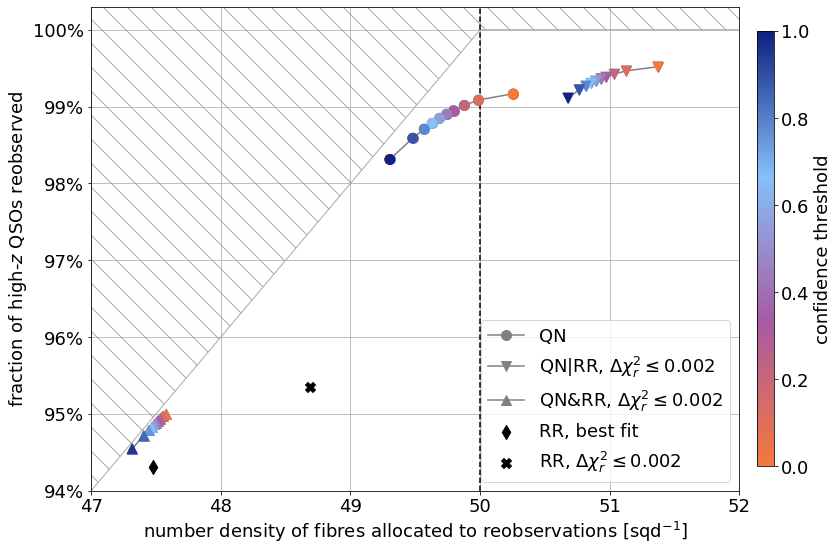

In [24]:
## Standard version of plot. This uses:
# - andmask in redrock
# - a delta-reduced-chi2 threshold of 0.002 in redrock

drc2_th = 0.002
exptype = 'randexp'

plot_strategies = ['QN {}'.format(exptype),
                   'RRngp andmask {}'.format(exptype),
                   'RRngp-a-{}-drc2th {}'.format(exptype[0],drc2_th),
                   'QN|RRngp-a-{}-drc2th {}'.format(exptype[0],drc2_th),
                   'QN&RRngp-a-{}-drc2th {}'.format(exptype[0],drc2_th),
                  ]
names = {'QN {}'.format(exptype): 'QN', 
         'RRngp andmask {}'.format(exptype): 'RR, best fit', 
         'RRngp-a-{}-drc2th {}'.format(exptype[0],drc2_th): r'RR, $\Delta\chi_r^2\leq{}$'.format(drc2_th), 
         'QN|RRngp-a-{}-drc2th {}'.format(exptype[0],drc2_th): 'QN|RR, $\Delta\chi_r^2\leq{}$'.format(drc2_th),
         'QN&RRngp-a-{}-drc2th {}'.format(exptype[0],drc2_th): 'QN&RR, $\Delta\chi_r^2\leq{}$'.format(drc2_th),
        }

filename = '../plots/classifier_performance_selecting_for_reobservation_{}_full.pdf'.format(exptype)
xmin,xmax = (47,52)
ymin = 0.94

# Define the strategies.
strategies = {names[s]: stratdefs[s] for s in plot_strategies}

# Determine the filter.
data_used = ['QN {}'.format(exptype),'RRngp andmask {}'.format(exptype)]
filt = np.ones(len(data_table)).astype(bool)
for d in data_used:
    d_filt = np.in1d(data_table['SPEC_ID'],data[d]['SPEC_ID'])
    filt &= d_filt
        
# Make final inputs.
print('INFO: {:6d}/{:6d} ({:3.1%}) spectra used'.format(filt.sum(),len(filt),filt.sum()/len(filt)))
filters = {None: filt}
strategies = {None: strategies}

# Make the plot.
fig, axs = plot.plot_reobservation_performance(data_table,strategies,filename=filename,
                                    dv_max=dv_max,zcut=zcut,ymin=ymin,xmin=xmin,xmax=xmax,
                                    verbose=False,n_highz_desi=n_highz_desi,filters=filters,
                                    figsize=figsize,nydec=0)
plt.show()

INFO: 503892/601912 (83.7%) spectra used


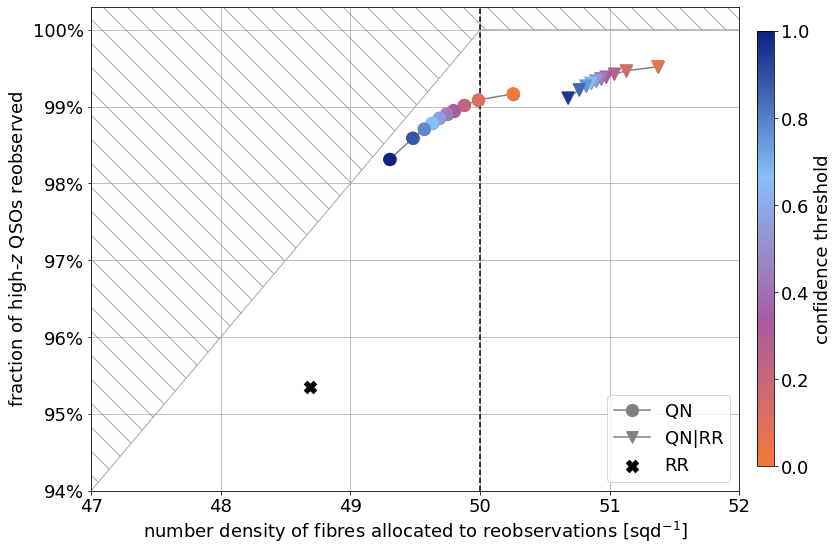

In [23]:
## Standard version of plot. This uses:
# - andmask in redrock
# - a delta-reduced-chi2 threshold of 0.002 in redrock

drc2_th = 0.002
exptype = 'randexp'

plot_strategies = ['QN {}'.format(exptype),
                   'RRngp-a-{}-drc2th {}'.format(exptype[0],drc2_th),
                   'QN|RRngp-a-{}-drc2th {}'.format(exptype[0],drc2_th),
                  ]
names = {'QN {}'.format(exptype): 'QN', 
         'RRngp-a-{}-drc2th {}'.format(exptype[0],drc2_th): 'RR', 
         'QN|RRngp-a-{}-drc2th {}'.format(exptype[0],drc2_th): 'QN|RR',
        }

filename = '../plots/classifier_performance_selecting_for_reobservation_{}_simple.pdf'.format(exptype)
xmin,xmax = (47,52)
ymin = 0.94

# Define the strategies.
strategies = {names[s]: stratdefs[s] for s in plot_strategies}

# Determine the filter.
data_used = ['QN {}'.format(exptype),'RRngp andmask {}'.format(exptype)]
filt = np.ones(len(data_table)).astype(bool)
for d in data_used:
    d_filt = np.in1d(data_table['SPEC_ID'],data[d]['SPEC_ID'])
    filt &= d_filt
        
# Make final inputs.
print('INFO: {:6d}/{:6d} ({:3.1%}) spectra used'.format(filt.sum(),len(filt),filt.sum()/len(filt)))
filters = {None: filt}
strategies = {None: strategies}

# Make the plot.
fig, axs = plot.plot_reobservation_performance(data_table,strategies,filename=filename,
                                    dv_max=dv_max,zcut=zcut,ymin=ymin,xmin=xmin,xmax=xmax,
                                    verbose=False,n_highz_desi=n_highz_desi,filters=filters,
                                    figsize=figsize,nydec=0,marker_size=150)
plt.show()

INFO: 503892/601912 (83.7%) spectra used
INFO: 2 colorbars needed
QN
true hz qsos: 185296
obj flagged: 186243.0
true hz qsos flagged: 183752.0
stars selected: 1058
gal selected: 454
lowz qso selected: 979
--------------------------------------------------------------------------------
frac true hz flagged: 0.991667
num dens fibres flagged: 50.255537

QN
true hz qsos: 185296
obj flagged: 185249.0
true hz qsos flagged: 183602.0
stars selected: 533
gal selected: 262
lowz qso selected: 852
--------------------------------------------------------------------------------
frac true hz flagged: 0.990858
num dens fibres flagged: 49.987318

QN
true hz qsos: 185296
obj flagged: 184842.0
true hz qsos flagged: 183471.0
stars selected: 406
gal selected: 169
lowz qso selected: 796
--------------------------------------------------------------------------------
frac true hz flagged: 0.990151
num dens fibres flagged: 49.877493

QN
true hz qsos: 185296
obj flagged: 184537.0
true hz qsos flagged: 183346.

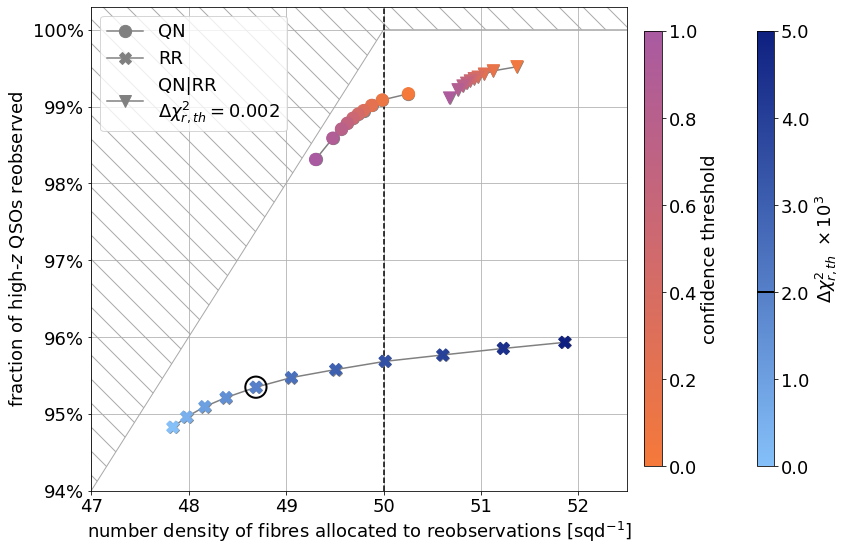

In [30]:
## 2 colorbar version of plot. This uses:
# - andmask in redrock
# - a delta-reduced-chi2 threshold of 0.002 in redrock

drc2_th = 0.002
exptype = 'randexp'

plot_strategies = ['QN {}'.format(exptype),
                   'RRngp-a-{}-drc2th string'.format(exptype[0]),
                   'QN|RRngp-a-{}-drc2th {}'.format(exptype[0],drc2_th),
                  ]
names = {'QN {}'.format(exptype): 'QN', 
         'RRngp-a-{}-drc2th string'.format(exptype[0]): 'RR', 
         'QN|RRngp-a-{}-drc2th {}'.format(exptype[0],drc2_th): 'QN|RR\n'+r'$\Delta\chi_{{r,th}}^2={}$'.format(drc2_th),
        }

filename = '../plots/classifier_performance_selecting_for_reobservation_{}_simple_2cb.pdf'.format(exptype)
xmin,xmax = (47,52.5)
ymin = 0.94

# Define the strategies.
strategies = {names[s]: stratdefs[s] for s in plot_strategies}

# Set which strategy links to which colorbar.
cbar_labels = {0: 'confidence threshold',
               1: r'$\Delta\chi_{{r,th}}^2~\times10^3$',
              }
cbar_tick_mults = {0: None, 1: 10**3}
vmins = {0: 0., 1: 0.}
vmaxs = {0: 1., 1: 0.005}
cbar_lines = {0: None, 1: [0.002]}

# Determine the filter.
data_used = ['QN {}'.format(exptype),'RRngp andmask {}'.format(exptype)]
filt = np.ones(len(data_table)).astype(bool)
for d in data_used:
    d_filt = np.in1d(data_table['SPEC_ID'],data[d]['SPEC_ID'])
    filt &= d_filt
        
# Make final inputs.
print('INFO: {:6d}/{:6d} ({:3.1%}) spectra used'.format(filt.sum(),len(filt),filt.sum()/len(filt)))
filters = {None: filt}
strategies = {None: strategies}

# Make the plot.
fig, axs = plot.plot_reobservation_performance(data_table,strategies,filename=filename,
                                    dv_max=dv_max,zcut=zcut,ymin=ymin,xmin=xmin,xmax=xmax,
                                    verbose=True,n_highz_desi=n_highz_desi,filters=filters,
                                    figsize=figsize,nydec=0,marker_size=150,legend_loc=2,
                                    cbar_labels=cbar_labels,cbar_tick_mults=cbar_tick_mults,
                                    vmins=vmins,vmaxs=vmaxs,cbar_lines=cbar_lines)

axs[0,0].scatter(48.690424,0.953473,marker='o',facecolor="None",edgecolor='k',s=450,linewidths=2.,zorder=3)
#axs[0,0].text(48.9,0.948,'Fig. 2',ha='center',va='center')

plt.savefig(filename)
plt.show()

INFO: 503892/601912 (83.7%) spectra used
INFO: 2 colorbars needed


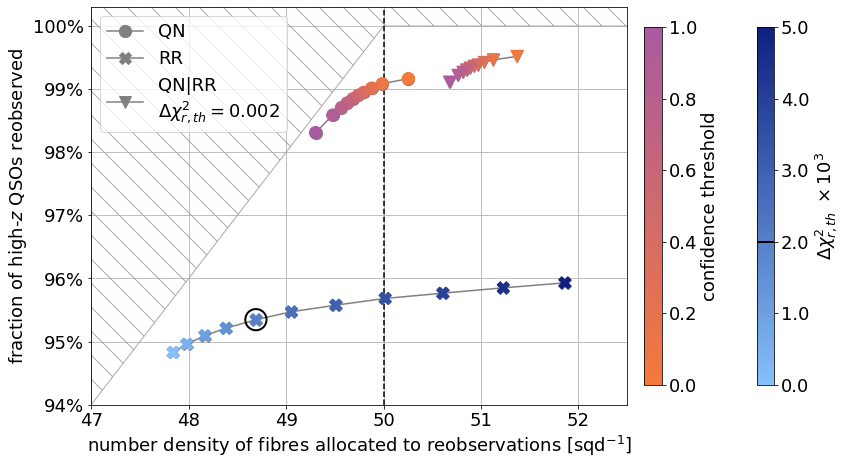

In [15]:
## 2 colorbar version of plot. This uses:
# - andmask in redrock
# - a delta-reduced-chi2 threshold of 0.002 in redrock

drc2_th = 0.002
exptype = 'randexp'

plot_strategies = ['QN {}'.format(exptype),
                   'RRngp-a-{}-drc2th string'.format(exptype[0]),
                   'QN|RRngp-a-{}-drc2th {}'.format(exptype[0],drc2_th),
                  ]
names = {'QN {}'.format(exptype): 'QN', 
         'RRngp-a-{}-drc2th string'.format(exptype[0]): 'RR', 
         'QN|RRngp-a-{}-drc2th {}'.format(exptype[0],drc2_th): 'QN|RR\n'+r'$\Delta\chi_{{r,th}}^2={}$'.format(drc2_th),
        }

filename = '../plots/classifier_performance_selecting_for_reobservation_{}_simple_2cb_small.pdf'.format(exptype)
xmin,xmax = (47,52.5)
ymin = 0.94

# Define the strategies.
strategies = {names[s]: stratdefs[s] for s in plot_strategies}

# Set which strategy links to which colorbar.
cbar_labels = {0: 'confidence threshold',
               1: r'$\Delta\chi_{{r,th}}^2~\times10^3$',
              }
cbar_tick_mults = {0: None, 1: 10**3}
vmins = {0: 0., 1: 0.}
vmaxs = {0: 1., 1: 0.005}
cbar_lines = {0: None, 1: [0.002]}

# Determine the filter.
data_used = ['QN {}'.format(exptype),'RRngp andmask {}'.format(exptype)]
filt = np.ones(len(data_table)).astype(bool)
for d in data_used:
    d_filt = np.in1d(data_table['SPEC_ID'],data[d]['SPEC_ID'])
    filt &= d_filt
        
# Make final inputs.
print('INFO: {:6d}/{:6d} ({:3.1%}) spectra used'.format(filt.sum(),len(filt),filt.sum()/len(filt)))
filters = {None: filt}
strategies = {None: strategies}

# Make the plot.
fig, axs = plot.plot_reobservation_performance(data_table,strategies,filename=filename,
                                    dv_max=dv_max,zcut=zcut,ymin=ymin,xmin=xmin,xmax=xmax,
                                    verbose=False,n_highz_desi=n_highz_desi,filters=filters,
                                    figsize=(12,6.8),nydec=0,marker_size=150,legend_loc=2,
                                    cbar_labels=cbar_labels,cbar_tick_mults=cbar_tick_mults,
                                    vmins=vmins,vmaxs=vmaxs,cbar_lines=cbar_lines)

axs[0,0].scatter(48.690424,0.953473,marker='o',facecolor="None",edgecolor='k',s=450,linewidths=2.,zorder=3)
#axs[0,0].text(48.9,0.948,'Fig. 2',ha='center',va='center')

plt.savefig(filename)
plt.show()

INFO: 444208/601912 (73.8%) spectra used


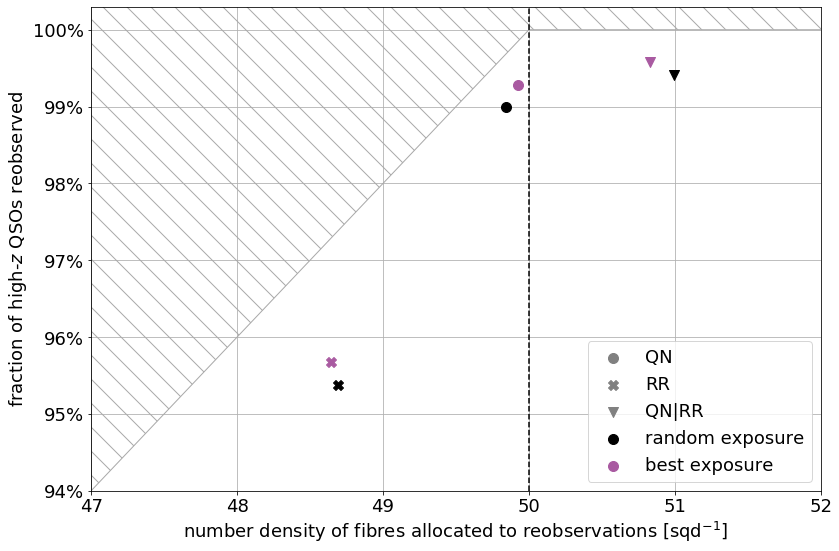

In [16]:
## Alternative version of plot. This uses:
# - both random and best exposures
# - c_th=0.3 in QuasarNET
# - andmask in redrock
# - a delta-reduced-chi2 threshold of 0.002 in redrock

drc2_th = 0.002
plot_strategies = ['QN randexp 1point','RRngp-a-r-drc2th {}'.format(drc2_th),
                   'QN|RRngp-a-r-drc2th {} 1point'.format(drc2_th),
                   #'QN2line randexp 1point',
                   'QN bestexp 1point','RRngp-a-b-drc2th {}'.format(drc2_th),
                   'QN|RRngp-a-b-drc2th {} 1point'.format(drc2_th),
                   #'QN2line bestexp 1point',
                  ]
names = {'QN randexp 1point': 'QN', 'RRngp-a-r-drc2th {}'.format(drc2_th): 'RR', 
         'QN|RRngp-a-r-drc2th {} 1point'.format(drc2_th): 'QN|RR', 'QN2line randexp 1point': 'QN 2-line',
         'QN bestexp 1point': 'QN*', 'RRngp-a-b-drc2th {}'.format(drc2_th): 'RR*', 
         'QN|RRngp-a-b-drc2th {} 1point'.format(drc2_th): 'QN|RR*', 'QN2line bestexp 1point': 'QN 2-line*',
        }
filename = '../plots/classifier_performance_selecting_for_reobservation_alt.pdf'
xmin,xmax = (47,52)
ymin = 0.94

# Define the strategies.
strategies = {names[s]: stratdefs[s] for s in plot_strategies}

# Determine the filter.
data_used = ['QN randexp','QN bestexp','RRngp andmask randexp','RRngp andmask bestexp']
filt = np.ones(len(data_table)).astype(bool)
for d in data_used:
    d_filt = np.in1d(data_table['SPEC_ID'],data[d]['SPEC_ID'])
    filt &= d_filt
        
# Make final inputs.
print('INFO: {:6d}/{:6d} ({:3.1%}) spectra used'.format(filt.sum(),len(filt),filt.sum()/len(filt)))
filters = {None: filt}
strategies = {None: strategies}

# Make the plot.
fig, axs = plot.plot_reobservation_performance(data_table,strategies,filename=filename,
                                    dv_max=dv_max,zcut=zcut,ymin=ymin,xmin=xmin,xmax=xmax,
                                    verbose=False,n_highz_desi=n_highz_desi,filters=filters,
                                    figsize=figsize,nydec=0,auto_legend=False)

artists = []
labels = []
legend_strats = ['QN randexp 1point',
                 'RRngp-a-r-drc2th {}'.format(drc2_th),
                 'QN|RRngp-a-r-drc2th {} 1point'.format(drc2_th),
                 #'QN2line randexp 1point'
                ]
legend_stratnames = {'QN randexp 1point': 'QN', 
                     'RRngp-a-r-drc2th {}'.format(drc2_th): 'RR',
                     'QN|RRngp-a-r-drc2th {} 1point'.format(drc2_th): 'QN|RR',
                     #'QN2line randexp 1point': 'QN 2-line',
                    }
for s in legend_strats:
    artists += [axs[0,0].scatter([],[],marker=stratdefs[s]['marker'],color='grey',s=100)]
    labels += [legend_stratnames[s]]
artists += [axs[0,0].scatter([],[],marker='o',color=stratdefs['QN randexp 1point']['color'],s=100)]
labels += ['random exposure']
artists += [axs[0,0].scatter([],[],marker='o',color=stratdefs['QN bestexp 1point']['color'],s=100)]
labels += ['best exposure']
plt.legend(artists,labels,loc=4)

plt.savefig(filename)
plt.show()

INFO: 503892/601912 (83.7%) spectra used
WARN: strategy RR|zwarn has been shifted by a factor of 0.004 in reobs dens to avoid point overlap


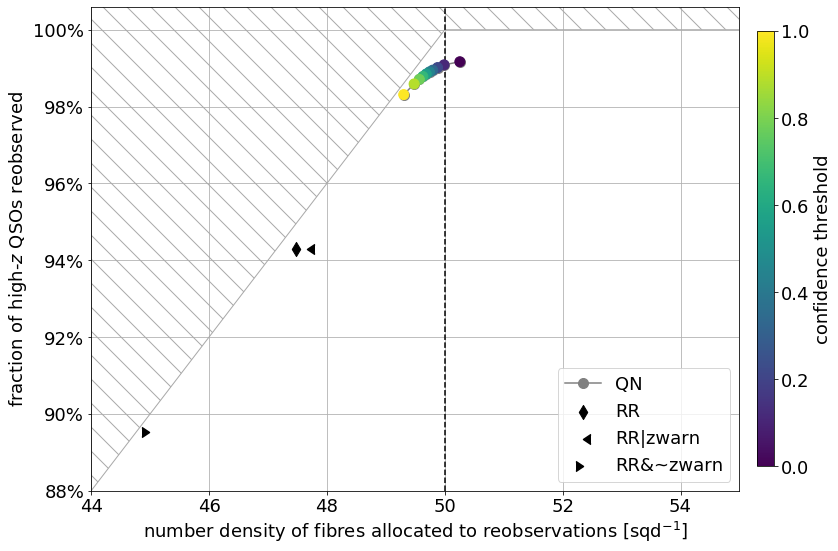

In [49]:
## Standard version of plot but with 3 RR points for including zwarn or not.
plot_strategies = ['QN randexp','RRngp andmask randexp','RRngp|zwarn andmask randexp','RRngp&~zwarn andmask randexp']
names = {'QN randexp': 'QN', 'RRngp andmask randexp': 'RR', 'RRngp|zwarn andmask randexp': 'RR|zwarn', 'RRngp&~zwarn andmask randexp': 'RR&~zwarn'}
filename = '../plots/classifier_performance_selecting_for_reobservation_zwarn.pdf'
xmin,xmax = (44,55)
ymin = 0.88

# Define the strategies.
strategies = {names[s]: stratdefs[s] for s in plot_strategies}

# Determine the filter.
data_used = ['QN randexp','RRngp andmask randexp']
filt = np.ones(len(data_table)).astype(bool)
for d in data_used:
    d_filt = np.in1d(data_table['SPEC_ID'],data[d]['SPEC_ID'])
    filt &= d_filt
        
# Make final inputs.
print('INFO: {:6d}/{:6d} ({:3.1%}) spectra used'.format(filt.sum(),len(filt),filt.sum()/len(filt)))
filters = {None: filt}
strategies = {None: strategies}

# Make the plot.
fig, axs = plot.plot_reobservation_performance(data_table,strategies,filename=filename,
                                    dv_max=dv_max,zcut=zcut,ymin=ymin,xmin=xmin,xmax=xmax,
                                    verbose=False,n_highz_desi=n_highz_desi,filters=filters,
                                    figsize=figsize,nydec=0)
plt.show()

INFO: 395223/601912 (65.7%) spectra used


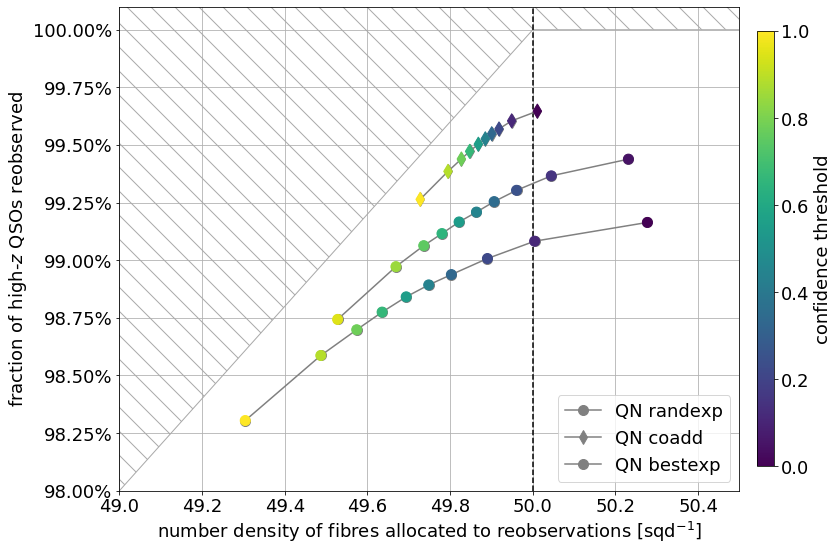

In [50]:
## Extra QN strategies version of plot
plot_strategies = ['QN randexp','QN coadd','QN bestexp']
names = {'QN randexp': 'QN randexp', 'QN coadd': 'QN coadd', 'QN bestexp': 'QN bestexp'}
filename = '../plots/classifier_performance_selecting_for_reobservation_qntest.pdf'
xmin,xmax = (49,50.5)
ymin = 0.98

# Define the strategies.
strategies = {names[s]: stratdefs[s] for s in plot_strategies}

# Determine the filter.
data_used = ['QN coadd','QN randexp','QN bestexp']
filt = np.ones(len(data_table)).astype(bool)
for d in data_used:
    d_filt = np.in1d(data_table['SPEC_ID'],data[d]['SPEC_ID'])
    filt &= d_filt
        
# Make final inputs.
print('INFO: {:6d}/{:6d} ({:3.1%}) spectra used'.format(filt.sum(),len(filt),filt.sum()/len(filt)))
filters = {None: filt}
strategies = {None: strategies}

# Make the plot.
fig, axs = plot.plot_reobservation_performance(data_table,strategies,filename=filename,
                                    dv_max=dv_max,zcut=zcut,ymin=ymin,xmin=xmin,xmax=xmax,
                                    verbose=False,n_highz_desi=n_highz_desi,filters=filters,
                                    figsize=figsize,nydec=2)
plt.show()

INFO: 464728/601912 (77.2%) spectra used


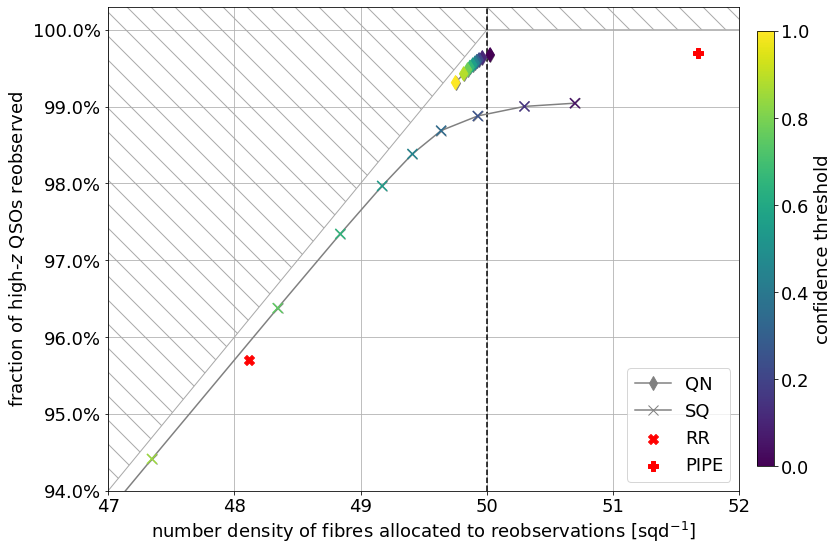

In [51]:
## Coadd only version of plot
plot_strategies = ['QN coadd','RR andmask coadd','PIPE','SQ coadd']
names = {'QN coadd': 'QN', 'RR andmask coadd': 'RR', 'PIPE': 'PIPE', 'SQ coadd': 'SQ'}
filename = '../plots/classifier_performance_selecting_for_reobservation_coadd.pdf'
xmin,xmax = (47,52)
ymin = 0.94

# Define the strategies.
strategies = {names[s]: stratdefs[s] for s in plot_strategies}

# Determine the filter.
data_used = ['QN coadd','RR andmask coadd','SQ coadd','PIPE']
filt = np.ones(len(data_table)).astype(bool)
for d in data_used:
    d_filt = np.in1d(data_table['SPEC_ID'],data[d]['SPEC_ID'])
    filt &= d_filt
        
# Make final inputs.
print('INFO: {:6d}/{:6d} ({:3.1%}) spectra used'.format(filt.sum(),len(filt),filt.sum()/len(filt)))
filters = {None: filt}
strategies = {None: strategies}

# Make the plot.
fig, axs = plot.plot_reobservation_performance(data_table,strategies,filename=filename,
                                    dv_max=dv_max,zcut=zcut,ymin=ymin,xmin=xmin,xmax=xmax,
                                    verbose=False,n_highz_desi=n_highz_desi,filters=filters,
                                    figsize=figsize,nydec=1)
plt.show()

INFO: 503867/601912 (83.7%) spectra used
INFO: No colorbar found in strategy RR
RR
INFO: No colorbar found in strategy RR, mask
RR, mask
INFO: No colorbar found in strategy RR, mask, $\chi_r^2$
RR, mask, $\chi_r^2$
INFO: No colorbar found in strategy RR, arch.
RR, arch.
INFO: No colorbar found in strategy RR, arch., mask
RR, arch., mask
INFO: 2 colorbars needed
RR
true hz qsos: 185289
obj flagged: 174212.0
true hz qsos flagged: 173329.0
stars selected: 41
gal selected: 1
lowz qso selected: 841
--------------------------------------------------------------------------------
frac true hz flagged: 0.935452
num dens fibres flagged: 47.010886

RR, mask
true hz qsos: 185289
obj flagged: 175939.0
true hz qsos flagged: 174737.0
stars selected: 41
gal selected: 1
lowz qso selected: 1160
--------------------------------------------------------------------------------
frac true hz flagged: 0.943051
num dens fibres flagged: 47.476914

RR, mask, $\chi_r^2$
true hz qsos: 185289
obj flagged: 177275.0

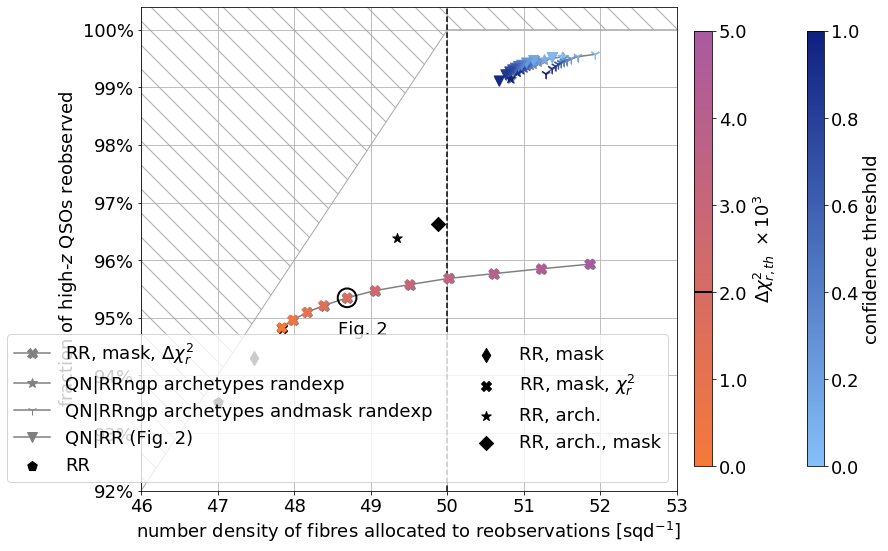

In [29]:
## Compare redrock version of plot
drc2_th = 0.002

plot_strategies = [#'QN randexp', 'RRngp andmask randexp'
                   #'QN randexp',
                   #'QN|RRngp-a-r-drc2th {}'.format(drc2_th),
                   #'RR coadd',
                   'RRngp randexp',
                   'RRngp andmask randexp',
                   'RRngp-a-r-drc2th 0.0',
                   'RRngp-a-r-drc2th string',
                   'RRngp archetypes randexp', 
                   'RRngp archetypes andmask randexp',
                   #'RRngp bestexp',
                   #'RRngp andmask bestexp',
                   #'RRold','RRngp coadd','RRngp andmask coadd',
                   #'RR andmask coadd',
                   #'RRngp-a-r-drc2th 0.0', 'RRngp-a-r-drc2th 0.001',
                   #'RRngp-a-r-drc2th 0.003', 'RRngp-a-r-drc2th 0.004', 'RRngp-a-r-drc2th 1.0',
                   #'RRngp archetypes randexp alt', 'RRngp archetypes randexp &~zwarn',  
                   'QN|RRngp archetypes randexp', 
                   'QN|RRngp archetypes andmask randexp', 
                   #'QN|RRngp archetypes randexp alt', 
                   'QN|RRngp-a-r-drc2th {}'.format(drc2_th),
                   #'RRngp-arch-r-drc2th {} alt'.format(drc2_th),
                   #'RRngp-arch-r-drc2th 0.002',
                   #'RRngp-arch-a-r-drc2th 0.002',
                   #'QN randexp 1point',
                   #'QN bestexp 1point',
                  ]

names = {'RRngp randexp':                       r'RR',
         'RRngp bestexp':                       r'RR best exp.',
         'RRngp andmask randexp':               r'RR, mask',
         'RRngp andmask bestexp':               r'RR best exp., mask',
         'RRngp-a-r-drc2th 0.0':                r'RR, mask, $\chi_r^2$',
         #'RRngp-a-r-drc2th {}'.format(drc2_th): 'RR (Fig. 2)',
         'RRngp archetypes randexp':            r'RR, arch.', 
         'RRngp archetypes andmask randexp':    r'RR, arch., mask',
         'RRngp-a-r-drc2th string':             r'RR, mask, $\Delta\chi_{{r}}^2$',
         
         'QN|RRngp archetypes randexp': 'QN|RRngp archetypes randexp', 
         'QN|RRngp archetypes andmask randexp': 'QN|RRngp archetypes andmask randexp',
         'QN|RRngp-a-r-drc2th {}'.format(drc2_th): 'QN|RRngp-a-r-drc2th {}'.format(drc2_th),
         'QN randexp': 'QN (Fig. 2)',
         'QN|RRngp-a-r-drc2th {}'.format(drc2_th): 'QN|RR (Fig. 2)',
         'RRngp-arch-r-drc2th 0.002': 'RRngp-arch-r-drc2th 0.002',
         'RRngp-arch-a-r-drc2th 0.002': 'RRngp-arch-a-r-drc2th 0.002',
         
         'QN randexp 1point': r'QN rand. exp., $c_\mathrm{th}=0.3$',
         'QN bestexp 1point': r'QN best exp., $c_\mathrm{th}=0.3$',
        }

filename = '../plots/classifier_performance_selecting_for_reobservation_rrtest.pdf'
xmin,xmax = (46,53)
ymin = 0.92

# Define the strategies.
strategies = {names[s]: stratdefs[s] for s in plot_strategies}
filters = None

data_used = [#'RRold', 
             #'QNold', 
             #'RR coadd', 'RRngp randexp', 'RRngp bestexp', 
             #'RR andmask coadd', 
             'RRngp andmask randexp', 'RRngp andmask bestexp', 
             #'RRngp coadd', 'RRngp andmask coadd', 'RRngp archetypes coadd', 
             'RRngp archetypes randexp', 'RRngp archetypes andmask randexp', 
             'QN randexp',
             #'QN bestexp', 
             #'QN coadd', 
             #'PIPE', 
             #'SQ coadd'
            ]
filt = np.ones(len(data_table)).astype(bool)
for d in data_used:
    d_filt = np.in1d(data_table['SPEC_ID'],data[d]['SPEC_ID'])
    filt = filt & d_filt

print('INFO: {:6d}/{:6d} ({:3.1%}) spectra used'.format(filt.sum(),len(filt),filt.sum()/len(filt)))
filters = {None: filt}
strategies = {None: strategies}

cbar_labels = {0: 'confidence threshold',
               1: r'$\Delta\chi_{{r,th}}^2~\times10^3$',
              }
cbar_tick_mults = {0: None, 1: 10**3}
vmins = {0: 0., 1: 0.}
vmaxs = {0: 1., 1: 0.005}
cbar_lines = {0: None, 1: [0.002]}

# Make the plot.
fig, axs = plot.plot_reobservation_performance(data_table,strategies,filename=filename,
                                    dv_max=dv_max,zcut=zcut,ymin=ymin,xmin=xmin,xmax=xmax,
                                    verbose=True,n_highz_desi=n_highz_desi,filters=filters,
                                    figsize=(12,8),nydec=0,vmins=vmins,vmaxs=vmaxs,
                                    legend_loc=4,ncol=2,cbar_tick_mults=cbar_tick_mults,
                                    cbar_labels=cbar_labels,cbar_lines=cbar_lines)

axs[0,0].scatter(48.690424,0.953473,marker='o',facecolor="None",edgecolor='k',s=350,linewidths=2.,zorder=3)
axs[0,0].text(48.9,0.948,'Fig. 2',ha='center',va='center')

plt.savefig(filename)
plt.show()

INFO: 601912/601912 (100.0%) spectra used
QN randexp
true hz qsos: 186237
obj flagged: 187178.0
true hz qsos flagged: 184650.0
stars selected: 1082
gal selected: 454
lowz qso selected: 992
--------------------------------------------------------------------------------
frac true hz flagged: 0.9915
num dens fibres flagged: 50.2526

QN randexp
true hz qsos: 186237
obj flagged: 186169.0
true hz qsos flagged: 184498.0
stars selected: 545
gal selected: 262
lowz qso selected: 864
--------------------------------------------------------------------------------
frac true hz flagged: 0.9907
num dens fibres flagged: 49.9817

QN randexp
true hz qsos: 186237
obj flagged: 185752.0
true hz qsos flagged: 184361.0
stars selected: 415
gal selected: 169
lowz qso selected: 807
--------------------------------------------------------------------------------
frac true hz flagged: 0.9899
num dens fibres flagged: 49.8698

QN randexp
true hz qsos: 186237
obj flagged: 185444.0
true hz qsos flagged: 184234.0
st

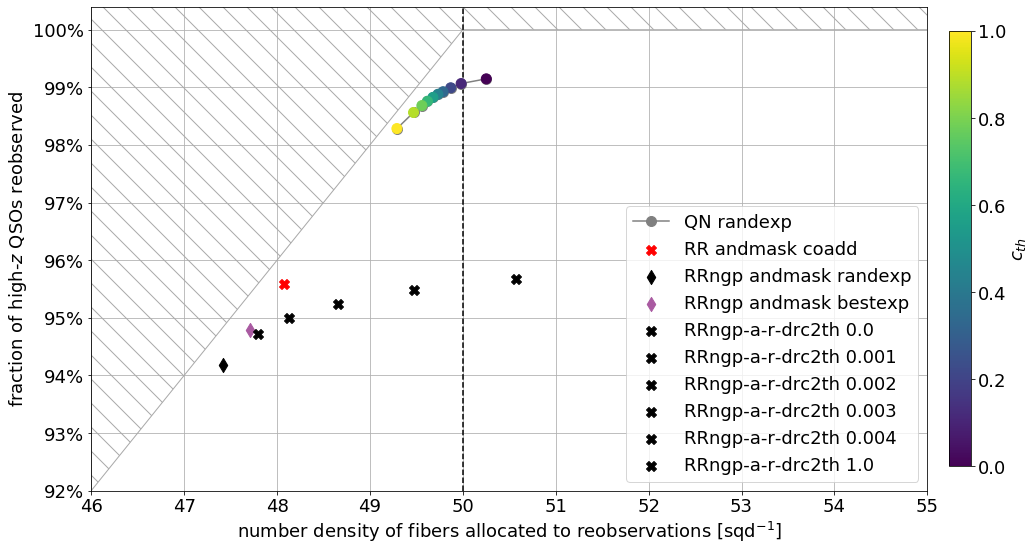

In [20]:
## Compare redrock version of plot
drc2_th = 0.002
plot_strategies = [#'QN randexp', 'RRngp andmask randexp'
                   'QN randexp',
                   #'RR coadd','RRngp randexp','RRngp bestexp',
                   #'RRold','RRngp coadd','RRngp andmask coadd',
                   'RR andmask coadd','RRngp andmask randexp','RRngp andmask bestexp',
                   'RRngp-a-r-drc2th 0.0', 'RRngp-a-r-drc2th 0.001',
                   'RRngp-a-r-drc2th {}'.format(drc2_th),
                   'RRngp-a-r-drc2th 0.003', 'RRngp-a-r-drc2th 0.004', 'RRngp-a-r-drc2th 1.0',
                   #'RRngp-arch-r-drc2th {} alt'.format(drc2_th),
                   #'RRngp archetypes randexp', 'RRngp archetypes randexp alt', 'RRngp archetypes randexp &~zwarn', 'RRngp archetypes andmask randexp', 
                   #'QN|RRngp archetypes randexp', 'QN|RRngp archetypes randexp alt', 
                   #'QN|RRngp-a-r-drc2th {}'.format(drc2_th),
                  ]

names = {s:s for s in plot_strategies}

filename = '../plots/classifier_performance_selecting_for_reobservation_rrtest.pdf'
xmin,xmax = (46,55)
ymin = 0.92

# Define the strategies.
strategies = {names[s]: stratdefs[s] for s in plot_strategies}
filters = None

"""#filt = (data_table['SPEC_ID'].data//1000000000)<5346

f_rr = variables.OUTDIR+'/results/rr_results/old/rr_sdr12q.fits'
rrold_data = utils.load_rr_data(f_rr)
#filt = np.in1d(data_table['SPEC_ID'].data,rrold_data['SPEC_ID'])"""

data_used = [#'RRold', 
             #'QNold', 
             #'RR coadd', 'RRngp randexp', 'RRngp bestexp', 'RR andmask coadd', 'RRngp andmask randexp', 'RRngp andmask bestexp', 
             #'RRngp coadd', 'RRngp andmask coadd', 'RRngp archetypes coadd', 'RRngp archetypes randexp', 'RRngp archetypes andmask randexp', 
             #'QN randexp',
             #'QN bestexp', 
             #'QN coadd', 
             #'PIPE', 
             #'SQ coadd'
            ]
filt = np.ones(len(data_table)).astype(bool)
for d in data_used:
    d_filt = np.in1d(data_table['SPEC_ID'],data[d]['SPEC_ID'])
    #if type(data_table['Z_{}'.format(d)])==astropy.table.column.MaskedColumn:
    #    d_filt = (~data_table['Z_{}'.format(d)].data.mask)
    filt &= d_filt
#filt &= (np.random.uniform(size=len(filt))<0.1)

"""from astropy.io import fits
h = fits.open(variables.OUTDIR+'/data/randexp/training_datasets/prop_0.1/data_dr12_randexp_train_indtrain_0_0.fits')
targetid = utils.platemjdfiber2targetid(h[1].data['PLATE'].astype('i8'),h[1].data['MJD'].astype('i8'),h[1].data['FIBERID'].astype('i8'))
#filt = ~np.in1d(data_table['OBJ_ID'],h[1].data['TARGETID'])
filt = ~np.in1d(data_table['SPEC_ID'],targetid)
print((~filt).sum())
h.close()"""

"""h = fits.open(variables.OUTDIR+'/data/randexp/training_datasets/prop_0.1/data_dr12_randexp_train_indtrain_0_0.fits')
# Identify spectra that are missing from output, but not due to presence in training data
obj_id_missing = data_table['OBJ_ID'].data[~np.in1d(data_table['SPEC_ID'],data['QN randexp']['SPEC_ID'])]
obj_id_missing_not_in_train = obj_id_missing[~np.in1d(obj_id_missing,h[1].data['TARGETID'])]
print(len(obj_id_missing),len(obj_id_missing_not_in_train))
filt = ~np.in1d(data_table['OBJ_ID'],obj_id_missing)
h.close()"""

"""filt = np.ones(len(data_table)).astype(bool)
for k in data.keys():
    if 'RR' in k:
        for i in [9]:
            w = ~((data_table['ZWARN_{}'.format(k)].data & (2**i))>0)
            filt &= w"""

print('INFO: {:6d}/{:6d} ({:3.1%}) spectra used'.format(filt.sum(),len(filt),filt.sum()/len(filt)))
filters = {None: filt}
strategies = {None: strategies}


# Make the plot.
fig, axs = plot.plot_reobservation_performance(data_table,strategies,filename=filename,
                                    dv_max=dv_max,zcut=zcut,ymin=ymin,xmin=xmin,xmax=xmax,
                                    verbose=True,n_highz_desi=n_highz_desi,filters=filters,
                                    figsize=(15,8),nydec=0)
plt.show()

In [ ]:
## OLD TESTS

"""## Load the old QN data.
f_qn = '/global/homes/j/jfarr/Projects/QuasarNET/test_olddat/qnAll-train_0.1_randexp_olddat_noamsgrad-test_randexp_olddat.fits'
data['QNoldtraindat_oldtestdat_noamsgrad'] = utils.load_qn_data(f_qn,n_detect=n_detect,c_th=c_th,include_c=include_c_qn)

## Load the old QN data.
f_qn = '/global/homes/j/jfarr/Projects/QuasarNET/test_olddat/qnAll-train_0.1_randexp_olddat-test_randexp_olddat.fits'
data['QNoldtraindat_oldtestdat'] = utils.load_qn_data(f_qn,n_detect=n_detect,c_th=c_th,include_c=include_c_qn)

## Load the old QN data.
f_qn = '/global/homes/j/jfarr/Projects/QuasarNET/test_olddat/qnAll-train_0.1_randexp_olddat-test_randexp_newdat.fits'
data['QNoldtraindat_newtestdat'] = utils.load_qn_data(f_qn,n_detect=n_detect,c_th=c_th,include_c=include_c_qn)

## Load the old QN data.
f_qn = '/global/homes/j/jfarr/Projects/QuasarNET/test_olddat/qnAll-train_0.1_randexp_newdat-test_randexp_olddat.fits'
data['QNnewtraindat_oldtestdat'] = utils.load_qn_data(f_qn,n_detect=n_detect,c_th=c_th,include_c=include_c_qn)

## Load the old QN data.
f_qn = '/global/homes/j/jfarr/Projects/QuasarNET/test_olddat/qnAll-train_0.1_randexp_newdat-test_randexp_newdat.fits'
data['QNnewtraindat_newtestdat'] = utils.load_qn_data(f_qn,n_detect=n_detect,c_th=c_th,include_c=include_c_qn)"""


"""# QNoldtraindat_oldtestdat_noamsgrad definitions.
n_detect = 1
strat = strategy.Strategy('qn',cf_kwargs={'qn_name':'QNoldtraindat_oldtestdat_noamsgrad'})
preds = [strat.predict(data_table,c_kwargs={'c_th':c_th_value,'n_detect':n_detect}) for c_th_value in c_th_values]
stratdefs['QNoldtraindat_oldtestdat_noamsgrad'] = {'w': [pred.get_ishighzqso(zcut=zcut) for pred in preds],
                   'color': c_th_values, 'marker': 's'}

# QNoldtraindat_oldtestdat definitions.
n_detect = 1
strat = strategy.Strategy('qn',cf_kwargs={'qn_name':'QNoldtraindat_oldtestdat'})
preds = [strat.predict(data_table,c_kwargs={'c_th':c_th_value,'n_detect':n_detect}) for c_th_value in c_th_values]
stratdefs['QNoldtraindat_oldtestdat'] = {'w': [pred.get_ishighzqso(zcut=zcut) for pred in preds],
                   'color': c_th_values, 'marker': 'p'}

# QNoldtraindat_newtestdat definitions.
n_detect = 1
strat = strategy.Strategy('qn',cf_kwargs={'qn_name':'QNoldtraindat_newtestdat'})
preds = [strat.predict(data_table,c_kwargs={'c_th':c_th_value,'n_detect':n_detect}) for c_th_value in c_th_values]
stratdefs['QNoldtraindat_newtestdat'] = {'w': [pred.get_ishighzqso(zcut=zcut) for pred in preds],
                   'color': c_th_values, 'marker': 'd'}

# QNnewtraindat_oldtestdat definitions.
n_detect = 1
strat = strategy.Strategy('qn',cf_kwargs={'qn_name':'QNnewtraindat_oldtestdat'})
preds = [strat.predict(data_table,c_kwargs={'c_th':c_th_value,'n_detect':n_detect}) for c_th_value in c_th_values]
stratdefs['QNnewtraindat_oldtestdat'] = {'w': [pred.get_ishighzqso(zcut=zcut) for pred in preds],
                   'color': c_th_values, 'marker': '^'}

# QNnewtraindat_newtestdat definitions.
n_detect = 1
strat = strategy.Strategy('qn',cf_kwargs={'qn_name':'QNnewtraindat_newtestdat'})
preds = [strat.predict(data_table,c_kwargs={'c_th':c_th_value,'n_detect':n_detect}) for c_th_value in c_th_values]
stratdefs['QNnewtraindat_newtestdat'] = {'w': [pred.get_ishighzqso(zcut=zcut) for pred in preds],
                   'color': c_th_values, 'marker': 'v'}"""


"""## Standard version of plot
#plot_strategies = ['QN','QNold','QNnewtraindat_newtestdat','QNoldtraindat_newtestdat','QNoldtraindat_oldtestdat','QNnewtraindat_oldtestdat']
plot_strategies = ['QN','QNold','QNoldtraindat_oldtestdat','QNoldtraindat_oldtestdat_noamsgrad']
filename = '../plots/classifier_performance_selecting_for_reobservation_current.pdf'
xmin,xmax = (49,51)
ymin = 0.97

# Define the strategies.
strategies = {s: stratdefs[s] for s in plot_strategies}

# Make the plot.
fig, axs = plot.plot_reobservation_performance(data_table,strategies,filename=filename,
                                    dv_max=dv_max,zcut=zcut,ymin=ymin,xmin=xmin,xmax=xmax,
                                    verbose=False,n_highz_desi=n_highz_desi,
                                    figsize=figsize,nydec=1)
plt.show()"""